In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from src.utils import get_wandb_summaries
from src.visualization.visualize import bars_with_labels_and_errors, draw_cd_diagram
import numpy as np

%load_ext autoreload 
%autoreload 2

In [2]:
import os
os.getcwd()

'/homes/gws/mikeam/MobileSensingSuite'

In [3]:
import wandb
api = wandb.Api()
api.run("mikeamerrill/neurips_2022/3a0taf7s")

<Run mikeamerrill/neurips_2022/3a0taf7s (finished)>

In [4]:
runs = ["35phrlu4", #ResNet Temporal Minute Level
        "3rwkobqn",
        "31tj07b1",
        "2pcamu8l",
        "37k9zwrj",
        
        "2mc7phgu", #Transformer Runs
        "23odsq2d",
        "25r6x125",
        "5n3okliz",
        "eklpudpi",
        "1ghpq3rv",
        "4pc16avd",
        "1a8cn2sq",
        "3jm6im5n",
        "22app7ku",
        
        
        "2n5stuum", #ResNet Runs
        "3l16u4kv",
        "3pzylajk",
        "uayu8ocu",
        "we4e5wxc",
        "h2se6v0o",
        "1kwv1xik",
        "7laduide",
        "lm475mj3",
        "wfdj4zt0",
        "1izcbq6i",
        "2ogvp6xd",
        "3t65zup5",
        "7euqdieh",
        "98wl00eh",

        "1yrc932u",
        "3a0taf7s",
        "3qbvv8jg",
        "1p1oaxg1",
        "3q0wyeqw",
        "2po9ch6q",
        "2zavi0iw",
        "2y2w1wv7",
        "2f1c2mbe",
        "340dbdda",
        "q2iumrxk",
        "19qx5ixa",
        "1pavh57i",
        "2pwy57en",
        "2s6y2dib",
        "10c06boh",
        "1739425g",
        "1jyim9f2",
        "201bjzp0",
        "p9z9cmz4",
    ]
    
summaries = get_wandb_summaries(runs, project="neurips_2022", entity="mikeamerrill")

In [5]:
summaries_df = pd.DataFrame(summaries)
summaries_df["multitask"] = summaries_df["command"].str.contains(".ckpt")

is_multitask = summaries_df[summaries_df["multitask"]]
summaries_df.loc[summaries_df["multitask"],"model"] = is_multitask["model"] + " - Daily Features Multitask"


summaries_df["hour_level"] = summaries_df["command"].str.contains("hour_level")
is_hour_level = summaries_df[summaries_df["hour_level"]]
summaries_df.loc[summaries_df["hour_level"],"model"] = is_hour_level["model"] + " - Hour Level"

summaries_df["test/roc_ci"] = list(zip(summaries_df['test/roc_auc_ci_low'], summaries_df['test/roc_auc_ci_high']))
summaries_df[["id","model","task","test/roc_auc","test/roc_auc_ci_low"]].sort_values("task")

,id,model,task,test/roc_auc,test/roc_auc_ci_low
42,1pavh57i,CNNToTransformerClassifier,PredictFluPos,0.792209,0.713342
41,19qx5ixa,XGBoost,PredictFluPos,0.700290,0.629462
14,22app7ku,TransformerClassifier - Hour Level,PredictFluPos,0.749094,0.653181
4,37k9zwrj,ResNet - Hour Level,PredictFluPos,0.856269,0.795152
35,2po9ch6q,CNNClassifier,PredictFluPos,0.798900,0.727804
48,201bjzp0,CNNToTransformerClassifier - Daily Features Mu...,PredictFluPos,0.856228,0.778254
15,2n5stuum,ResNet - Hour Level,PredictFluPos,0.742372,0.669537
9,eklpudpi,TransformerClassifier - Hour Level,PredictFluPos,0.848785,0.780711
26,2ogvp6xd,ResNet,PredictFluPos,0.569585,0.474024
25,1izcbq6i,ResNet,PredictFluPos,0.550680,0.472003


In [6]:
# manual_adjustments = {
#     "3ss14njj":[("multitask",True),("task","PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0"),
#                 ("model","CNNToTransformerEncoder - Daily Features Multitask")],
#     "z0nbehr0":[("multitask",True),("task","PredictFluPos"),
#                 ("model","CNNToTransformerEncoder - Daily Features Multitask")]
# }
# for run_id, changes in manual_adjustments.items():
#     for k,v in changes:
#         summaries_df.loc[summaries_df["id"] == run_id,k] = v


OLD_TASK_NAMES = [ 'PredictFluPos',
                  'PredictSurveyCol-have_flu > 0', 
                 'PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0',
                 'PredictSurveyCol-symptom_severity__fever_q_3 > 0 | symptom_severity__fever_q_2 > 0',
                 'PredictSurveyCol-(symptom_severity__q_fatigue_2 > 0) | (symptom_severity__q_fatigue_3 > 0)']

NEW_TASK_NAMES = [ 'Flu Positivity',
                  'Two or More\nFlu Symptoms',
                  'Severe Cough',
                  'Severe Fever',
                  'Severe Fatigue']

task_name_map = dict(zip(OLD_TASK_NAMES,NEW_TASK_NAMES))
summaries_df["task"] = summaries_df["task"].map(task_name_map)


summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]

In [7]:
summaries_df["command"]

0     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
1     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
2     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
3     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
4     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
5     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
6     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
7     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
8     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
9     python /mmfs1/gscratch/bdata/mikeam/MobileSens...
10    python /mmfs1/gscratch/bdata/mikeam/MobileSens...
11    python /mmfs1/gscratch/bdata/mikeam/MobileSens...
12    python /mmfs1/gscratch/bdata/mikeam/MobileSens...
13    python /mmfs1/gscratch/bdata/mikeam/MobileSens...
14    python /mmfs1/gscratch/bdata/mikeam/MobileSens...
15    python /mmfs1/gscratch/bdata/mikeam/MobileSens...
16    python /mmfs1/gscratch/bdata/mikeam/MobileSens...
17    python /mmfs1/gscratch/bdata/mikeam/Mobile

In [8]:
summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]
summaries_df["split_type"] = np.where(summaries_df["command"].str.contains("by_participant"),"User","Temporal")

In [9]:
summaries_df[summaries_df["task"]=='Flu Positivity'][["model","split_type","test/pr_auc"]]

,model,split_type,test/pr_auc
4,ResNet - Hour Level,Temporal,0.010188
9,TransformerClassifier - Hour Level,Temporal,0.009832
14,TransformerClassifier - Hour Level,User,0.028306
15,ResNet - Hour Level,User,0.003917
25,ResNet,Temporal,0.000425
26,ResNet,User,0.000542
35,CNNClassifier,User,0.004935
41,XGBoost,User,0.002057
42,CNNToTransformerClassifier,User,0.015468
48,CNNToTransformerClassifier - Daily Features Mu...,User,0.042602


In [10]:
OLD_MODEL_NAMES = ["XGBoost",
               "CNNClassifier",
               "CNNToTransformerClassifier",
               "CNNToTransformerClassifier - Daily Features Multitask",
               "ResNet",
               "ResNet - Hour Level",
               "TransformerClassifier - Hour Level"
                
]

NEW_MODEL_NAMES = [
    "XGBoost - Day Level",
    "CNN",
    "CNN-Transformer",
    "CNN-Transformer Pretrained",
    "ResNet",
    "ResNet - Hour Level",
    "Transformer - Hour Level"
]
model_name_map = dict(zip(OLD_MODEL_NAMES,NEW_MODEL_NAMES))
model_order_map = lambda x: NEW_MODEL_NAMES.index(x)
summaries_df["model_clean"] = summaries_df["model"].map(model_name_map)
summaries_df = summaries_df.sort_values(by="model_clean",key=lambda x: x.map(model_order_map))

### Compare with runs from last paper:

In [11]:
kdd_runs = runs = [
        # "1szazbm1",
        "19h7xs81",

        "20gczthf",
        # "3g83xe10",
        "1ke6xden",
        # "301fj0y2",
        "1x254xwv",
        "289402rh",
        "2911eip8",
        # "2czots5t",
        "21ebfhh3",
        "23qp4fss",
        "2ix8tob4",
        # "1e5ddrbv",
        "7r8nxjo5",
        "z0nbehr0",
        "2ncle1v9",
        "3ss14njj",
        "1apcb94k", # CNN Models
        "ko9zy18b",
        "2irztt2o",
        "27eeg42m",
        "9kq7490z",
        "eq4g39ub", # More CNN Transformer
        "1g7it1lr"
    ]
    
kdd_summaries = get_wandb_summaries(kdd_runs, entity="mikeamerrill", project = "kdd2022")

In [12]:
kdd_summaries_df = pd.DataFrame(kdd_summaries)
kdd_summaries_df["multitask"] = kdd_summaries_df["command"].str.contains("pretrained_predict_daily_features.ckpt")

is_multitask = kdd_summaries_df[kdd_summaries_df["multitask"]]
kdd_summaries_df.loc[kdd_summaries_df["multitask"],"model"] = is_multitask["model"] + " - Daily Features Multitask"

kdd_summaries_df["test/roc_ci"] = list(zip(kdd_summaries_df['test/roc_auc_ci_low'], kdd_summaries_df['test/roc_auc_ci_high']))


manual_adjustments = {
    "3ss14njj":[("multitask",True),("task","PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0"),
                ("model","CNNToTransformerEncoder - Daily Features Multitask")],
    "z0nbehr0":[("multitask",True),("task","PredictFluPos"),
                ("model","CNNToTransformerEncoder - Daily Features Multitask")]
}
for run_id, changes in manual_adjustments.items():
    for k,v in changes:
        kdd_summaries_df.loc[kdd_summaries_df["id"] == run_id,k] = v



OLD_TASK_NAMES = [ 'PredictFluPos',
                  'PredictSurveyCol-have_flu > 0', 
                 'PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0',
                 'PredictSurveyCol-symptom_severity__fever_q_3 > 0 | symptom_severity__fever_q_2 > 0',
                 'PredictSurveyCol-(symptom_severity__q_fatigue_2 > 0) | (symptom_severity__q_fatigue_3 > 0)']

NEW_TASK_NAMES = [ 'Flu Positivity',
                  'Two or More\nFlu Symptoms',
                  'Severe Cough',
                  'Severe Fever',
                  'Severe Fatigue']

task_name_map = dict(zip(OLD_TASK_NAMES,NEW_TASK_NAMES))
kdd_summaries_df["task"] = kdd_summaries_df["task"].map(task_name_map)


kdd_summaries_df["roc_ci"] = kdd_summaries_df["test/roc_auc"] - kdd_summaries_df["test/roc_auc_ci_low"]
kdd_summaries_df["pr_ci"] =  kdd_summaries_df["test/pr_auc_ci_high"] - kdd_summaries_df["test/pr_auc"]


KDD_OLD_MODEL_NAMES = ["XGBoost",
               "CNN",
               "CNNToTransformerEncoder",
               "CNNToTransformerEncoder - Daily Features Multitask",
]

KDD_NEW_MODEL_NAMES = [
    "XGBoost - Day Level",
    "CNN",
    "CNN-Transformer",
    "CNN-Transformer Pretrained",
]
model_name_map = dict(zip(KDD_OLD_MODEL_NAMES,KDD_NEW_MODEL_NAMES))
kdd_summaries_df["model_clean"] = kdd_summaries_df["model"].map(model_name_map)

In [13]:
kdd_summaries_df[["id","model","task","test/roc_auc","test/roc_auc_ci_low"]].sort_values("task")

,id,model,task,test/roc_auc,test/roc_auc_ci_low
9,7r8nxjo5,XGBoost,Flu Positivity,0.708416,0.648562
14,ko9zy18b,CNN,Flu Positivity,0.859530,0.797333
11,2ncle1v9,CNNToTransformerEncoder,Flu Positivity,0.883975,0.835983
10,z0nbehr0,CNNToTransformerEncoder - Daily Features Multi...,Flu Positivity,0.886786,0.839088
16,27eeg42m,CNN,Severe Cough,0.689547,0.664689
12,3ss14njj,CNNToTransformerEncoder - Daily Features Multi...,Severe Cough,0.708455,0.684186
19,1g7it1lr,CNNToTransformerEncoder,Severe Cough,0.697401,0.671394
6,21ebfhh3,XGBoost,Severe Cough,0.703520,0.684066
7,23qp4fss,CNNToTransformerEncoder - Daily Features Multi...,Severe Fatigue,0.758492,0.739412
8,2ix8tob4,CNNToTransformerEncoder,Severe Fatigue,0.712649,0.694916


In [14]:
kdd_summaries_df["split_type"] = "Temporal"
summaries_df["split_type"] = np.where(summaries_df["command"].str.contains("by_participant"),"User","Temporal")
all_summaries_df = pd.concat([summaries_df,kdd_summaries_df])

In [15]:
melt_id_vars = ["model_clean","task","split_type"]
metrics = pd.melt(all_summaries_df, id_vars=melt_id_vars, value_vars=["test/pr_auc","test/roc_auc"], value_name="metric_val")

pr_cis = pd.melt(all_summaries_df, id_vars=melt_id_vars, value_vars=["pr_ci"], value_name="ci")
pr_cis["variable"] = "test/pr_auc"

roc_cis = pd.melt(all_summaries_df, id_vars=melt_id_vars, value_vars=["roc_ci"], value_name="ci")
roc_cis["variable"] = "test/roc_auc"
cis = pd.concat([pr_cis,roc_cis])

metrics = pd.merge(metrics,cis)
metrics["variable"] = metrics["variable"].map({"test/roc_auc":"ROC AUC",
                                            "test/pr_auc": "PR AUC"})

In [16]:
metrics["model_clean"].value_counts()

XGBoost - Day Level           20
CNN                           20
CNN-Transformer               20
CNN-Transformer Pretrained    20
ResNet                        20
ResNet - Hour Level           20
Transformer - Hour Level      20
Name: model_clean, dtype: int64

In [17]:
MODEL_PLOT_ORDER = [
    "XGBoost - Day Level",
    "CNN",
    "CNN-Transformer",
    "CNN-Transformer Pretrained",
    "ResNet",
    "ResNet - Hour Level",
    "Transformer - Hour Level"
]


MODEL_PLOT_ORDER = [
    "XGBoost - Day Level",
    "CNN",
    "CNN-Transformer",
    "CNN-Transformer Pretrained",
    "ResNet",
    "ResNet - Hour Level",
    "Transformer - Hour Level"
]
model_order_map = lambda x: [MODEL_PLOT_ORDER.index(xx) for xx in x]
metrics = metrics.sort_values("model_clean", key = model_order_map)

In [18]:
metrics[(metrics["model_clean"]=="ResNet") & (metrics["split_type"]=="Temporal")]

# For visualization purposes
metrics["ci"] = np.clip(metrics["ci"],0.001,None)
metrics["metric_val"] = np.clip(metrics["metric_val"],0.001,None)

11/15/2022 15:01:55 - WARNING - matplotlib.font_manager -   findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
11/15/2022 15:01:55 - WARNING - matplotlib.font_manager -   findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


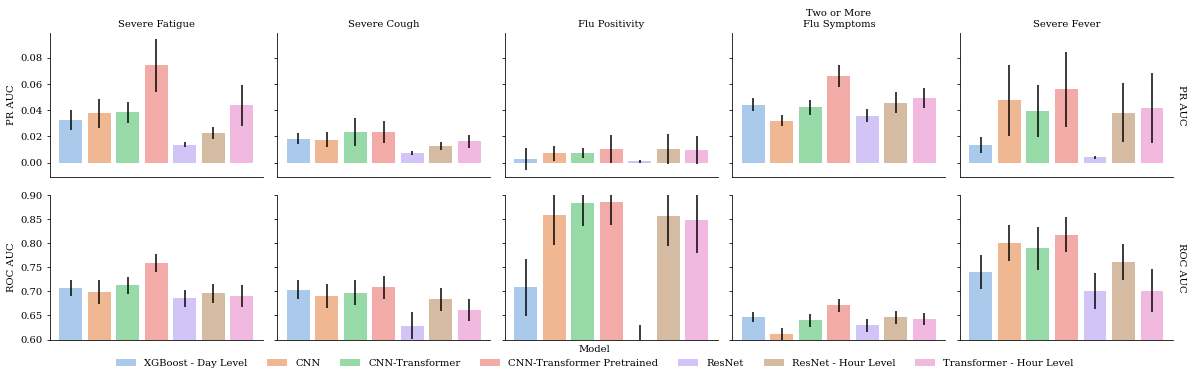

In [19]:
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
def add_error_bars(x,y,errors,**kwargs):
    plt.errorbar(x,y,yerr=errors, color="black")

    

with plt.style.context('/homes/gws/mikeam/seattleflustudy/src/visualization/stylesheets/paper.mplstyle'):
    g = (sns.FacetGrid(metrics[metrics["split_type"] == "Temporal"],
                    col="task",row="variable", hue= "model_clean", height=2.5, aspect=0.3, palette="pastel",
                    sharey="row", margin_titles=True)
        .map(sns.barplot,'model_clean','metric_val', order=MODEL_PLOT_ORDER)
        .map(add_error_bars,'model_clean','metric_val',"ci",order=MODEL_PLOT_ORDER)
        .set_titles(col_template="{col_name}", row_template="{row_name}")
        .set_axis_labels("", "")
        .set_xticklabels("")
        .set(xticks=[])
        .add_legend(loc='center',bbox_to_anchor=(.5, 0.0),ncol=len(MODEL_PLOT_ORDER),title="Model", shadow=True))

    g.axes[0][0].set_ylabel("PR AUC")
    g.axes[1][0].set_ylabel("ROC AUC")
    [x.set_ylim([0.6,0.9]) for x in g.axes[1]]
    plt.tight_layout()

In [20]:
pretty_table = (metrics[metrics["split_type"] == "Temporal"].pivot(index=["model_clean","variable"], columns=["task"], values=["metric_val"]).unstack(1).round(4)
                    .sort_values(by="model_clean",key=model_order_map))                    
pretty_table

metric_val                               \
task                       Flu Positivity         Severe Cough           
variable                           PR AUC ROC AUC       PR AUC ROC AUC   
model_clean                                                              
XGBoost - Day Level                0.0027  0.7084       0.0183  0.7035   
CNN                                0.0070  0.8595       0.0174  0.6895   
CNN-Transformer                    0.0072  0.8840       0.0233  0.6974   
CNN-Transformer Pretrained         0.0104  0.8868       0.0230  0.7085   
ResNet                             0.0010  0.5507       0.0073  0.6288   
ResNet - Hour Level                0.0102  0.8563       0.0126  0.6832   
Transformer - Hour Level           0.0098  0.8488       0.0162  0.6621   

                                                                        \
task                       Severe Fatigue         Severe Fever           
variable                           PR AUC ROC AUC       PR AUC ROC AUC   
model_clean                                                              
XGBoost - Day Level                0.0322  0.7075       0.0133  0.7408   
CNN                                0.0376  0.6992       0.0476  0.8008   
CNN-Transformer                    0.0384  0.7126       0.0392  0.7898   
CNN-Transformer Pretrained         0.0743  0.7585       0.0561  0.8177   
ResNet                             0.0137  0.6858       0.0039  0.7011   
ResNet - Hour Level                0.0223  0.6958       0.0379  0.7614   
Transformer - Hour Level           0.0439  0.6905       0.0418  0.7016   

                                                              
task                       Two or More\nFlu Symptoms          
variable                                      PR AUC ROC AUC  
model_clean                                                   
XGBoost - Day Level                           0.0443  0.6470  
CNN                                           0.0320  0.6116  
CNN-Transformer                               0.0422  0.6398  
CNN-Transformer Pretrained                    0.0661  0.6710  
ResNet                                        0.0358  0.6293  
ResNet - Hour Level                           0.0458  0.6458  
Transformer - Hour Level                      0.0494  0.6418

In [21]:
metrics["model_clean"].value_counts()

XGBoost - Day Level           20
CNN                           20
CNN-Transformer               20
CNN-Transformer Pretrained    20
ResNet                        20
ResNet - Hour Level           20
Transformer - Hour Level      20
Name: model_clean, dtype: int64

In [22]:
pretty_table = (metrics.pivot(index=["task","variable","split_type"], columns=["model_clean"], values=["metric_val"]).unstack(1).round(3)
                    )
pretty_table_ROC = pretty_table.xs('ROC AUC', level='variable', axis=1)
pretty_table_ROC.columns = pretty_table_ROC.columns.get_level_values(1)
pretty_table_ROC = pretty_table_ROC[MODEL_PLOT_ORDER]

In [23]:
pretty_table_ROC

model_clean                           XGBoost - Day Level    CNN  \
task                      split_type                               
Flu Positivity            Temporal                  0.708  0.860   
                          User                      0.700  0.799   
Severe Cough              Temporal                  0.704  0.690   
                          User                      0.669  0.636   
Severe Fatigue            Temporal                  0.708  0.699   
                          User                      0.720  0.690   
Severe Fever              Temporal                  0.741  0.801   
                          User                      0.776  0.801   
Two or More\nFlu Symptoms Temporal                  0.647  0.612   
                          User                      0.632  0.617   

model_clean                           CNN-Transformer  \
task                      split_type                    
Flu Positivity            Temporal              0.884   
                          User                  0.792   
Severe Cough              Temporal              0.697   
                          User                  0.654   
Severe Fatigue            Temporal              0.713   
                          User                  0.697   
Severe Fever              Temporal              0.790   
                          User                  0.777   
Two or More\nFlu Symptoms Temporal              0.640   
                          User                  0.615   

model_clean                           CNN-Transformer Pretrained  ResNet  \
task                      split_type                                       
Flu Positivity            Temporal                         0.887   0.551   
                          User                             0.856   0.570   
Severe Cough              Temporal                         0.708   0.629   
                          User                             0.732   0.673   
Severe Fatigue            Temporal                         0.758   0.686   
                          User                             0.756   0.695   
Severe Fever              Temporal                         0.818   0.701   
                          User                             0.838   0.661   
Two or More\nFlu Symptoms Temporal                         0.671   0.629   
                          User                             0.636   0.581   

model_clean                           ResNet - Hour Level  \
task                      split_type                        
Flu Positivity            Temporal                  0.856   
                          User                      0.742   
Severe Cough              Temporal                  0.683   
                          User                      0.648   
Severe Fatigue            Temporal                  0.696   
                          User                      0.717   
Severe Fever              Temporal                  0.761   
                          User                      0.765   
Two or More\nFlu Symptoms Temporal                  0.646   
                          User                      0.633   

model_clean                           Transformer - Hour Level  
task                      split_type                            
Flu Positivity            Temporal                       0.849  
                          User                           0.749  
Severe Cough              Temporal                       0.662  
                          User                           0.677  
Severe Fatigue            Temporal                       0.690  
                          User                           0.686  
Severe Fever              Temporal                       0.702  
                          User                           0.769  
Two or More\nFlu Symptoms Temporal                       0.642  
                          User                           0.652

In [24]:
print(pretty_table_ROC.to_latex(index_names=True,col_space=1,bold_rows=True,multirow=True))

\begin{tabular}{llrrrrrrr}
\toprule
                          & \textbf{model\_clean} &  XGBoost - Day Level &    CNN &  CNN-Transformer &  CNN-Transformer Pretrained &  ResNet &  ResNet - Hour Level &  Transformer - Hour Level \\
\textbf{task} & \textbf{split\_type} &                      &        &                  &                             &         &                      &                           \\
\midrule
\multirow{2}{*}{\textbf{Flu Positivity}} & \textbf{Temporal} &                0.708 &  0.860 &            0.884 &                       0.887 &   0.551 &                0.856 &                     0.849 \\
                          & \textbf{User} &                0.700 &  0.799 &            0.792 &                       0.856 &   0.570 &                0.742 &                     0.749 \\
\cline{1-9}
\multirow{2}{*}{\textbf{Severe Cough}} & \textbf{Temporal} &                0.704 &  0.690 &            0.697 &                       0.708 &   0.629 &                0.683 

In [25]:
pretty_table_PR = pretty_table.xs('PR AUC', level='variable', axis=1)
pretty_table_PR.columns = pretty_table_PR.columns.get_level_values(1)
pretty_table_PR = pretty_table_PR[MODEL_PLOT_ORDER]

In [26]:
pretty_table_PR

model_clean                           XGBoost - Day Level    CNN  \
task                      split_type                               
Flu Positivity            Temporal                  0.003  0.007   
                          User                      0.002  0.005   
Severe Cough              Temporal                  0.018  0.017   
                          User                      0.018  0.026   
Severe Fatigue            Temporal                  0.032  0.038   
                          User                      0.041  0.052   
Severe Fever              Temporal                  0.013  0.048   
                          User                      0.027  0.060   
Two or More\nFlu Symptoms Temporal                  0.044  0.032   
                          User                      0.042  0.050   

model_clean                           CNN-Transformer  \
task                      split_type                    
Flu Positivity            Temporal              0.007   
                          User                  0.015   
Severe Cough              Temporal              0.023   
                          User                  0.030   
Severe Fatigue            Temporal              0.038   
                          User                  0.070   
Severe Fever              Temporal              0.039   
                          User                  0.063   
Two or More\nFlu Symptoms Temporal              0.042   
                          User                  0.061   

model_clean                           CNN-Transformer Pretrained  ResNet  \
task                      split_type                                       
Flu Positivity            Temporal                         0.010   0.001   
                          User                             0.043   0.001   
Severe Cough              Temporal                         0.023   0.007   
                          User                             0.047   0.014   
Severe Fatigue            Temporal                         0.074   0.014   
                          User                             0.071   0.028   
Severe Fever              Temporal                         0.056   0.004   
                          User                             0.099   0.003   
Two or More\nFlu Symptoms Temporal                         0.066   0.036   
                          User                             0.079   0.028   

model_clean                           ResNet - Hour Level  \
task                      split_type                        
Flu Positivity            Temporal                  0.010   
                          User                      0.004   
Severe Cough              Temporal                  0.013   
                          User                      0.025   
Severe Fatigue            Temporal                  0.022   
                          User                      0.044   
Severe Fever              Temporal                  0.038   
                          User                      0.016   
Two or More\nFlu Symptoms Temporal                  0.046   
                          User                      0.059   

model_clean                           Transformer - Hour Level  
task                      split_type                            
Flu Positivity            Temporal                       0.010  
                          User                           0.028  
Severe Cough              Temporal                       0.016  
                          User                           0.043  
Severe Fatigue            Temporal                       0.044  
                          User                           0.047  
Severe Fever              Temporal                       0.042  
                          User                           0.065  
Two or More\nFlu Symptoms Temporal                       0.049  
                          User                           0.070

In [27]:
print(pretty_table_PR.to_latex(index_names=True,col_space=1,bold_rows=True,multirow=True))

\begin{tabular}{llrrrrrrr}
\toprule
                          & \textbf{model\_clean} &  XGBoost - Day Level &    CNN &  CNN-Transformer &  CNN-Transformer Pretrained &  ResNet &  ResNet - Hour Level &  Transformer - Hour Level \\
\textbf{task} & \textbf{split\_type} &                      &        &                  &                             &         &                      &                           \\
\midrule
\multirow{2}{*}{\textbf{Flu Positivity}} & \textbf{Temporal} &                0.003 &  0.007 &            0.007 &                       0.010 &   0.001 &                0.010 &                     0.010 \\
                          & \textbf{User} &                0.002 &  0.005 &            0.015 &                       0.043 &   0.001 &                0.004 &                     0.028 \\
\cline{1-9}
\multirow{2}{*}{\textbf{Severe Cough}} & \textbf{Temporal} &                0.018 &  0.017 &            0.023 &                       0.023 &   0.007 &                0.013 

## Critical Difference Diagrams - PR:

In [28]:
to_cd_diag  = all_summaries_df.rename(columns={"task":"dataset_name",
                                            "test/pr_auc":"accuracy",
                                            "model_clean":"classifier_name"})

to_cd_diag = to_cd_diag.set_index(["split_type","dataset_name","classifier_name"])        

to_cd_diag.loc[("Temporal","Two or More\nFlu Symptoms","CNN-Transformer"),"accuracy"] = 0.037
to_cd_diag.loc[("Temporal","Severe Cough","CNN-Transformer"),"accuracy"] = 0.011
to_cd_diag.loc[("Temporal","Severe Fatigue","CNN-Transformer"),"accuracy"] = 0.039
to_cd_diag.loc[("Temporal","Severe Fever","CNN-Transformer"),"accuracy"] = 0.042
to_cd_diag.loc[("Temporal","Flu Positivity","CNN-Transformer"),"accuracy"] = 0.009


to_cd_diag.loc[("Temporal","Two or More\nFlu Symptoms","CNN"),"accuracy"] = 0.0244
to_cd_diag.loc[("Temporal","Severe Cough","CNN"),"accuracy"] = 0.0080
to_cd_diag.loc[("Temporal","Severe Fatigue","CNN"),"accuracy"] = 0.016
to_cd_diag.loc[("Temporal","Severe Fever","CNN"),"accuracy"] = 0.015
to_cd_diag.loc[("Temporal","Flu Positivity","CNN"),"accuracy"] = 0.002



/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2914: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


In [29]:
to_cd_diag

_timestamp  \
split_type dataset_name              classifier_name                   
User       Two or More\nFlu Symptoms XGBoost - Day Level  1654019163   
           Flu Positivity            XGBoost - Day Level  1653952773   
           Severe Fever              XGBoost - Day Level  1653953893   
           Severe Cough              XGBoost - Day Level  1653955024   
           Severe Fatigue            XGBoost - Day Level  1653956209   
...                                                              ...   
Temporal   Severe Fever              CNN                  1643135383   
           Severe Cough              CNN                  1643155146   
           Severe Fatigue            CNN                  1643216868   
           Severe Fever              CNN-Transformer      1643214802   
           Severe Cough              CNN-Transformer      1643215609   

                                                          test/best_roc_auc  \
split_type dataset_name              classifier_name                          
User       Two or More\nFlu Symptoms XGBoost - Day Level                NaN   
           Flu Positivity            XGBoost - Day Level                NaN   
           Severe Fever              XGBoost - Day Level                NaN   
           Severe Cough              XGBoost - Day Level                NaN   
           Severe Fatigue            XGBoost - Day Level                NaN   
...                                                                     ...   
Temporal   Severe Fever              CNN                           0.800785   
           Severe Cough              CNN                           0.689547   
           Severe Fatigue            CNN                           0.699181   
           Severe Fever              CNN-Transformer               0.789822   
           Severe Cough              CNN-Transformer               0.697401   

                                                          test/pr_auc_ci_low  \
split_type dataset_name              classifier_name                           
User       Two or More\nFlu Symptoms XGBoost - Day Level            0.038861   
           Flu Positivity            XGBoost - Day Level            0.000999   
           Severe Fever              XGBoost - Day Level            0.014521   
           Severe Cough              XGBoost - Day Level            0.015175   
           Severe Fatigue            XGBoost - Day Level            0.034579   
...                                                                      ...   
Temporal   Severe Fever              CNN                            0.020423   
           Severe Cough              CNN                            0.011813   
           Severe Fatigue            CNN                            0.026779   
           Severe Fever              CNN-Transformer                0.019174   
           Severe Cough              CNN-Transformer                0.012811   

                                                          train/best_roc_auc  \
split_type dataset_name              classifier_name                           
User       Two or More\nFlu Symptoms XGBoost - Day Level                 NaN   
           Flu Positivity            XGBoost - Day Level                 NaN   
           Severe Fever              XGBoost - Day Level                 NaN   
           Severe Cough              XGBoost - Day Level                 NaN   
           Severe Fatigue            XGBoost - Day Level                 NaN   
...                                                                      ...   
Temporal   Severe Fever              CNN                            0.852371   
           Severe Cough              CNN                            0.907071   
           Severe Fatigue            CNN                            0.845194   
           Severe Fever              CNN-Transformer                0.940995   
           Severe Cough              CNN-Transformer                0.890838   

           

In [30]:
to_cd_diag = to_cd_diag.reset_index()
to_cd_diag["dataset_name"] = to_cd_diag["dataset_name"] + "-" + to_cd_diag["split_type"]

['XGBoost - Day Level' 'CNN' 'CNN-Transformer'
 'CNN-Transformer Pretrained' 'ResNet' 'ResNet - Hour Level'
 'Transformer - Hour Level']
21.08571428571429
CNN                            0.0
CNN-Transformer                0.0
CNN-Transformer Pretrained    10.0
ResNet                         0.0
ResNet - Hour Level            0.0
Transformer - Hour Level       0.0
XGBoost - Day Level            0.0
dtype: float64
[('ResNet', 'Transformer - Hour Level', 0.001953125, True), ('CNN-Transformer Pretrained', 'XGBoost - Day Level', 0.005859375, True), ('CNN', 'CNN-Transformer Pretrained', 0.009765625, True), ('CNN-Transformer', 'ResNet', 0.009765625, True), ('CNN-Transformer Pretrained', 'ResNet', 0.009765625, True), ('CNN', 'Transformer - Hour Level', 0.013671875, True), ('Transformer - Hour Level', 'XGBoost - Day Level', 0.013671875, True), ('CNN-Transformer Pretrained', 'ResNet - Hour Level', 0.02734375, True), ('CNN', 'CNN-Transformer', 0.083984375, True), ('CNN-Transformer', 'CNN-Transform

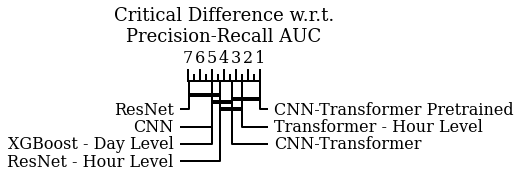

In [36]:
with plt.style.context('/homes/gws/mikeam/seattleflustudy/src/visualization/stylesheets/paper.mplstyle'):
    draw_cd_diagram(to_cd_diag.reset_index(), alpha=0.10, labels=False,title="Critical Difference w.r.t.\nPrecision-Recall AUC")
#plt.savefig("../../reports/neurips2022/crit_diff_pr.pdf", bbox_inches="tight")

# Critical Difference Diagrams - ROC:

In [33]:
to_cd_diag_roc  = all_summaries_df.rename(columns={"task":"dataset_name",
                                            "test/roc_auc":"accuracy",
                                            "model_clean":"classifier_name"})

to_cd_diag_roc = to_cd_diag_roc.set_index(["split_type","dataset_name","classifier_name"])    
to_cd_diag_roc = to_cd_diag_roc.reset_index()
to_cd_diag_roc["dataset_name"] = to_cd_diag_roc["dataset_name"] + "-" + to_cd_diag_roc["split_type"]

['XGBoost - Day Level' 'CNN' 'CNN-Transformer'
 'CNN-Transformer Pretrained' 'ResNet' 'ResNet - Hour Level'
 'Transformer - Hour Level']
15.257142857142867
CNN                           0.0
CNN-Transformer               0.0
CNN-Transformer Pretrained    9.0
ResNet                        0.0
ResNet - Hour Level           0.0
Transformer - Hour Level      1.0
XGBoost - Day Level           0.0
dtype: float64
[('CNN-Transformer Pretrained', 'ResNet', 0.001953125, True), ('ResNet', 'XGBoost - Day Level', 0.013671875, True), ('CNN-Transformer', 'ResNet', 0.01953125, True), ('ResNet', 'Transformer - Hour Level', 0.02734375, True), ('ResNet', 'ResNet - Hour Level', 0.037109375, True), ('CNN-Transformer Pretrained', 'XGBoost - Day Level', 0.048828125, True), ('CNN', 'ResNet', 0.10546875, False), ('CNN-Transformer Pretrained', 'ResNet - Hour Level', 0.130859375, False), ('CNN-Transformer Pretrained', 'Transformer - Hour Level', 0.130859375, False), ('CNN', 'CNN-Transformer Pretrained', 0.2324218

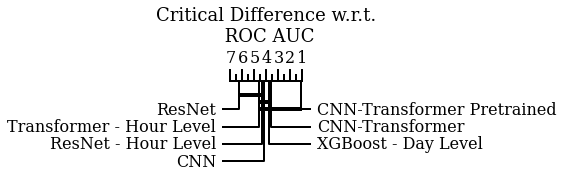

In [37]:
with plt.style.context('/homes/gws/mikeam/seattleflustudy/src/visualization/stylesheets/paper.mplstyle'):
    predicate = to_cd_diag_roc["split_type"] == "Temporal" 
    draw_cd_diagram(to_cd_diag_roc.reset_index(), alpha=0.10, labels=False,title="Critical Difference w.r.t.\n ROC AUC")
#plt.savefig("../../reports/neurips2022/crit_diff_roc.pdf", bbox_inches="tight")